<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

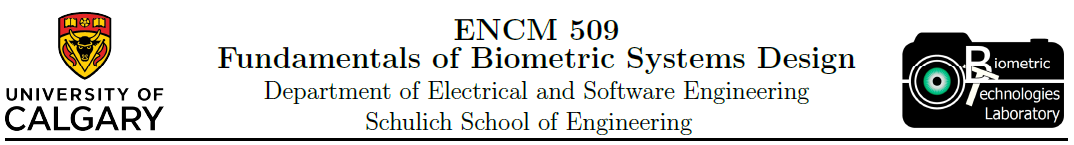

**General Marks**
1. Introduction (a paragraph about the purpose of the lab).
2. (10 marks) Description of the result on each exercise  with illustrations/graphs and analysis of the results (marks are distributed as shown in the Exercise section).
3. Conclusion (a paragraph on what is the main take-out of the lab).

### Introduction
The objective of this lab 2 is to get used to signature data acquisition and statistical analysis, prior to verification or recognition. We used the Wacom Bamboo Fun Signature Pad with its corresponding driver and SigGet to record 30 samples each of genuine and impostor signatures. We also got 30 samples of a written word to compare.

### Importing packages and initial set up:

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import pandas as pd
from scipy.stats import norm

# to keep a good size for the plot figure, not the plot area!
# from matplotlib import rcParams
# rcParams.update({'figure.autolayout': True})

- **Exercise 1** (2 marks): Consider a random sample of a normally distributed data with mean $\mu = 50$ and standard deviation $\sigma = 5$. The Scipy's function `norm.rvs(...)` is used to draw samples from a normal distribution.
    - Create another set of 1000 samples with $\mu = 50$ and $\sigma = 5$.
    - Plot the histogram with 100 bins.
    - Compare the results of the calculations of both sets. What conclusions can be drawn from the amount of samples compared with the mean and standard deviation calculated and the number of bins considered? 

##### Graphical representation of a random sample of data with a mean of 50, std of 5, 80 samples, and 10 bins:

In [10]:
# Theoretical Mean and Std
mu = 50
std = 5
qtt_samples = 80 # 80 samples

pop_norm = norm.rvs(mu, std, size=qtt_samples)
pop_norm 

array([55.64414976, 53.39401117, 54.22360911, 53.78827966, 54.61635988,
       49.58865099, 58.97541715, 49.70496599, 46.11535748, 47.97723644,
       47.99063694, 46.35817619, 62.33908234, 52.68791824, 52.86184512,
       47.18156761, 38.08005933, 56.2299196 , 49.72069588, 56.71291222,
       52.55284742, 46.15152113, 53.54089734, 50.09956631, 39.44735599,
       44.99989089, 52.37448653, 53.36617644, 46.72237409, 49.70982285,
       44.02996193, 41.7211164 , 50.75799193, 50.723367  , 58.24882155,
       52.11567549, 53.37156997, 48.21126982, 51.40873182, 56.50972199,
       47.58152492, 44.83282252, 47.20281396, 49.56111341, 48.67404888,
       44.81374947, 54.42340621, 52.07484574, 50.46801147, 47.05672924,
       46.36329107, 48.24574477, 50.58727909, 42.01002851, 44.77477981,
       55.29526895, 47.9873747 , 50.01852642, 54.00485875, 49.46981413,
       45.58561625, 51.26255574, 50.90382889, 50.86550374, 49.95873056,
       54.57789182, 55.13092934, 50.9347474 , 51.78587336, 44.82

REAL mean: 50.11; std: 4.37


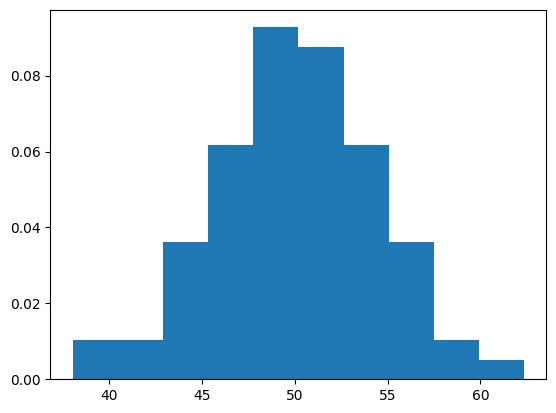

In [11]:
plt.hist(pop_norm, bins=10, density=True);
print('REAL mean: %.2f; std: %.2f' % (np.mean(pop_norm), np.std(pop_norm)))

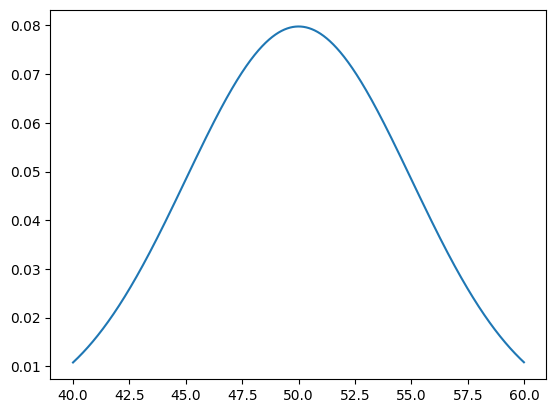

In [12]:
x = np.arange(40, 60, 0.01)

x_pdf = norm.pdf(x, loc=mu, scale=std)
plt.plot(x, x_pdf);

##### Graphical representation of a random sample of data with a mean of 50, std of 5, 1000 samples, and 100 bins:

In [13]:
# Theoretical Mean and Std
mu = 50
std = 5
qtt_samples = 1000 # 1000 samples

pop_norm = norm.rvs(mu, std, size=qtt_samples)
pop_norm 

array([50.90247153, 55.86648434, 46.80503929, 51.60659491, 52.8543034 ,
       43.50404392, 49.6650048 , 49.07017134, 54.22726993, 48.65375554,
       40.03478275, 48.89025246, 42.42033445, 43.40028254, 51.99928347,
       51.45569726, 60.34353973, 47.00360617, 55.03644553, 43.37974251,
       48.53005564, 54.77449802, 51.04161745, 53.31045717, 49.93830522,
       50.46586442, 58.19766375, 56.13218804, 48.2506626 , 53.92433627,
       53.70529282, 50.52149844, 53.89980322, 46.19894329, 59.21546289,
       55.15466105, 52.32629268, 55.31056991, 49.20819539, 47.5427725 ,
       52.38084856, 48.57934829, 52.69993973, 51.63943891, 56.50633263,
       49.31423565, 49.14101393, 47.17313613, 58.86242263, 55.44540574,
       49.18169098, 46.08377896, 48.74473223, 49.08022739, 59.58170553,
       44.35173305, 53.45222783, 45.96873594, 53.89557793, 43.2660699 ,
       45.43400491, 45.33383088, 42.30954061, 48.96461311, 43.11284084,
       42.50831661, 55.16623118, 55.00398729, 48.3667799 , 45.08

REAL mean: 50.14; std: 4.69


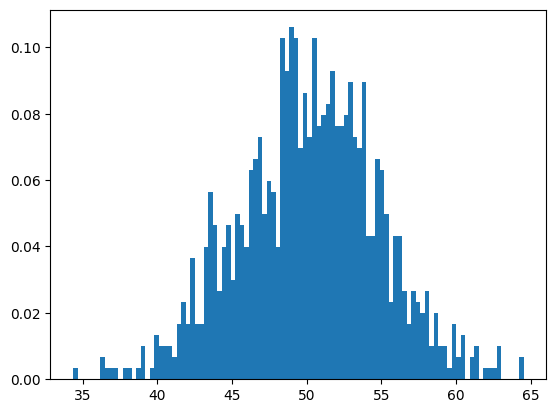

In [14]:
plt.hist(pop_norm, bins=100, density=True); # Want 100 bins for histogram
print('REAL mean: %.2f; std: %.2f' % (np.mean(pop_norm), np.std(pop_norm)))

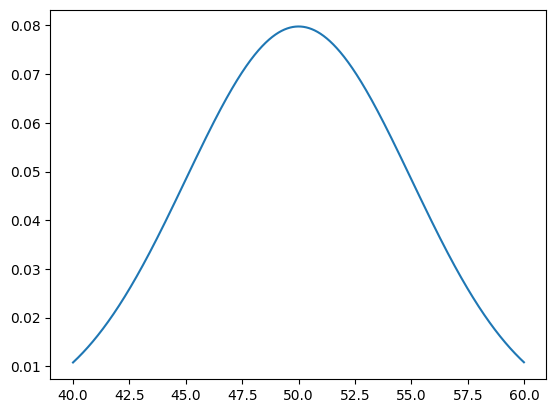

In [15]:
x = np.arange(40, 60, 0.01)

x_pdf = norm.pdf(x, loc=mu, scale=std)
plt.plot(x, x_pdf);

#### As we can see when comparing the histogram of each data set, the first data set with 80 samples and 10 bins show a lot less detail as there are less bins and less samples, which makes it harder to see how data is spread. Compared to the first histogram, the second histogram is better at showing data spread as there are many more samples and a lot more bins, and the histogram is able to show data in smaller intervals. This makes it much easier to see how data is distributed in the data set.

- **Exercise 2** (1 marks): Consider a sample data of the word *Biometrics* written by a "genuine" person, and an "impostor" as a signature that replicates the shape but not the original pressure. Load the sample signature provided.

In [16]:
# make sure to put the correct path to where your data is.
# The dataset share on D2L has the following folders :
# 'signature_samples/biometrics/'
# 'signature_samples/calgary/'
# 'signature_samples/hello/'

# 'genuine' or 'impostor'
subdir = 'impostor/'
data_dir = 'signature_samples/biometrics/' + subdir

csv_file = pd.read_csv(data_dir + '1.csv')

# show the first lines of the data loaded
# the file contains 4 columns : [X, Y, Time , Pressure ]
csv_file.head()

# splitting the original data/ matrix into 3 variables
coord1 = csv_file [['X', 'Y']].to_numpy()
time1 = csv_file['Time'].to_numpy().reshape((-1,1))
prs1 = csv_file ['Pressure'].to_numpy().reshape((-1,1))

FileNotFoundError: [Errno 2] No such file or directory: 'signature_samples/biometrics/impostor/1.csv'

In [ ]:
# to correctly map the pressure into the colormap the normalization is required
prs1 = prs1 / np.max(prs1) * 255
prs1 = prs1.astype(int)

pressuremap = cm.get_cmap('jet', np.max(prs1)+1)

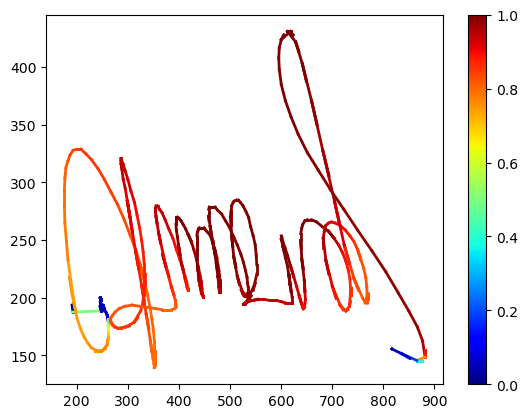

In [ ]:
for i in range(len(prs1)-1):
    c = pressuremap(prs1[i]).squeeze()
    im = plt.plot(coord1[i:i+2,0], coord1[i:i+2,1], linewidth=2, c=c)
sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm)

#### Calculating the mean and the std of the pressure of one signature:

In [ ]:
mu = np.mean(prs1)
std = np.std(prs1)
print ('mean: %.2f; std: %.2f' % (mu, std))

mean: 210.83; std: 33.41


#### Plotting the normal distribution:

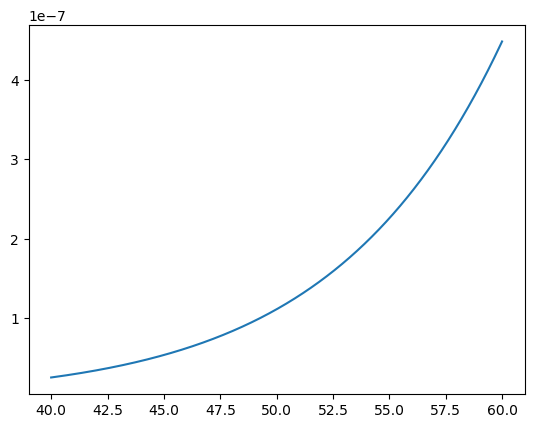

In [ ]:
x = np.arange(40, 200, 0.01)

x_pdf = norm.pdf(x, loc=mu, scale=std)
plt.plot(x, x_pdf);

- **Exercise 3** (1 mark): The code to calculate velocity and plot velocity map of one signature, provided in this lab, has the following `if` statement: `if time_diff == 0:`. Explain why it is necessary.

-    ##### This if statement is necessary because some points are recorded as being at the same time value. When calculating the velocity if two points are at the same time value the time diff will be 0. When this happens the formula of distance/time will not work as distance will be divided by 0. So the if statement corrects this case to instead have a very small time diff.

- **Exercise 4** (3 marks): Now  perform statistical analysis of pressure and velocity distribution  across average values of pressure or 30 signatures of the same person. We will represent the pressure of each signature by its average (mean) value, and then consider the distribution of these average values across genuine signatures. Consider 30 genuine signatures (yours or pre-recorded sample set, part a), and calculate average (mean) values and deviation from average (which will be calculated using standard deviation) for pressure. Plot a normal distribution of the average pressure values across the 30 signatures of the same individual. Perform the same for velocity. 

In [ ]:
def calc_velocity(time, coords):
    vel = np.zeros((len(time)-1, 1))

    for i in range(len(time)-1):
        distance = np.sqrt((coords[i+1,0] - coords[i,0])**2 +
                           (coords[i+1,1] - coords[i,1])**2)
        
        # if too fast time_diff = 0
        time_diff = time[i+1] - time[i]
        if time_diff == 0:
            time_diff = 0.0001

        vel[i] = distance / time_diff
        vel[i] = int(vel[i] * 1000) + 1

    vel = np.insert(vel, 0, 1)
    vel = vel / np.max(vel) * 255
    vel = vel.astype(int)
    
    return vel

In [ ]:

data_dir = '../Lab2/CTruong - genuine/'

# columns: mean_vel, std_vec, mean_prs, std_prs
stats_measures = np.zeros((30,4))

# using 10-30 signatures
for i in range(30):
    csv_file = pd.read_csv(data_dir + '%d.csv' % (i+1))
    
    coord1 = csv_file[['X', 'Y']].to_numpy()
    time1 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time1, coord1)
    
    stats_measures[i, 0] = np.mean(vel)
    stats_measures[i, 1] = np.std(vel)
    
    stats_measures[i, 2] = np.mean(prs1)
    stats_measures[i, 3] = np.std(prs1)
    

,X,Y,Pressure,Time
0,228.130192,249.578875,0.062593,0
1,231.219642,248.576891,0.066530,1
2,236.187811,246.545091,0.062593,1
3,242.157964,244.568957,0.062593,1
4,248.169866,242.537156,0.060640,1


0.9376332494721175 0.03676015912560343


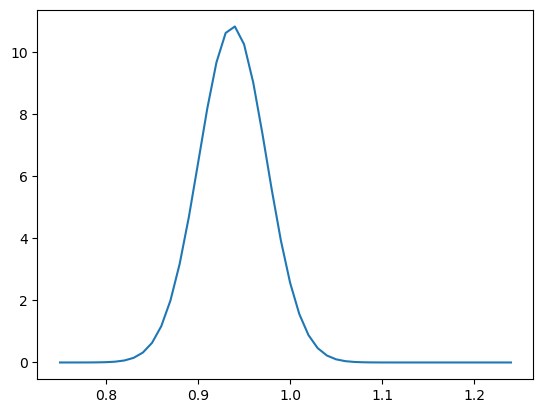

In [ ]:
mu_prs = np.mean(stats_measures[:,2])
std_prs = np.std(stats_measures[:,3])
print(mu_prs, std_prs)

x = np.arange(0.75,1.25, 0.01)

x_pdf = norm.pdf(x, loc=mu_prs, scale=std_prs)

plt.plot(x, x_pdf);

18.23065096647796 6.300577984925454


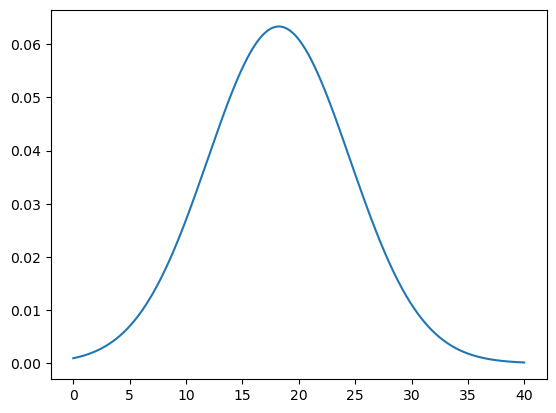

In [ ]:
mu_prs = np.mean(stats_measures[:,0])
std_prs = np.std(stats_measures[:,1])
print(mu_prs, std_prs)

x = np.arange(0,40, 0.01)

x_pdf = norm.pdf(x, loc=mu_prs, scale=std_prs)

plt.plot(x, x_pdf);

- **Exercise 5** (3 marks): Perform statistical analysis of average pressure and velocity distribution across 30 impostor signatures. As an "impostor", you can use either the 30 "forged" signatures (or part $b$ of the pre-recorded set), or 30 writings by yourself, of different shape/word (or part $c$ of the pre-recorded set). Represent the pressure (or velocity) of each signature by its average (mean), and then consider the distribution of these averages across 30 impostor signatures. How different are those distributions for "genuine" signatures from Exercise 4 and the "impostor" from Exercise 5?

In [ ]:
data_dir = '../Lab2/CTruong - impostor/'

# columns: mean_vel, std_vec, mean_prs, std_prs
stats_measures = np.zeros((30,4))

# using 10-30 signatures
for i in range(30):
    csv_file = pd.read_csv(data_dir + '%d.csv' % (i+1))
    
    coord1 = csv_file[['X', 'Y']].to_numpy()
    time1 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time1, coord1)
    
    stats_measures[i, 0] = np.mean(vel)
    stats_measures[i, 1] = np.std(vel)
    
    stats_measures[i, 2] = np.mean(prs1)
    stats_measures[i, 3] = np.std(prs1)

In [ ]:
mu_prs = np.mean(stats_measures[:,2])
std_prs = np.std(stats_measures[:,3])
print(mu_prs, std_prs)

x = np.arange(0.75,1.25, 0.01)

x_pdf = norm.pdf(x, loc=mu_prs, scale=std_prs)

plt.plot(x, x_pdf);

In [ ]:
mu_prs = np.mean(stats_measures[:,0])
std_prs = np.std(stats_measures[:,1])
print(mu_prs, std_prs)

x = np.arange(0,40, 0.01)

x_pdf = norm.pdf(x, loc=mu_prs, scale=std_prs)

plt.plot(x, x_pdf);

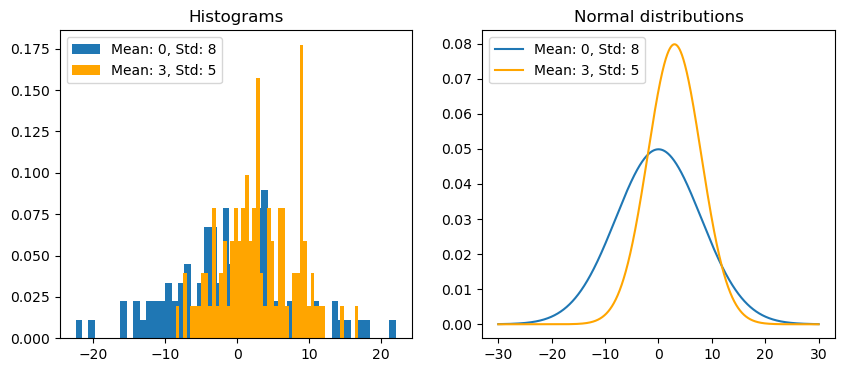

In [ ]:
mu1, std1 = 0, 8 # blue
mu2, std2 = 3, 5 # orange

# population with higher variance
pop_norm1 = norm.rvs(mu1, std1, size=100)
pop_norm2 = norm.rvs(mu2, std2, size=100)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(pop_norm1, bins=50, density=True);
plt.hist(pop_norm2, bins=50, density=True, color='orange')
plt.title('Histograms')
plt.legend(['Mean: 0, Std: 8', 'Mean: 3, Std: 5'])

plt.subplot(1,2,2)
x1 = np.arange(-30, 30, 0.01)
plt.plot(x1, norm.pdf(x1, loc=mu1, scale=std1))
plt.plot(x1, norm.pdf(x1, loc=mu2, scale=std2), color='orange')
plt.legend(['Mean: 0, Std: 8', 'Mean: 3, Std: 5'])
plt.title('Normal distributions');

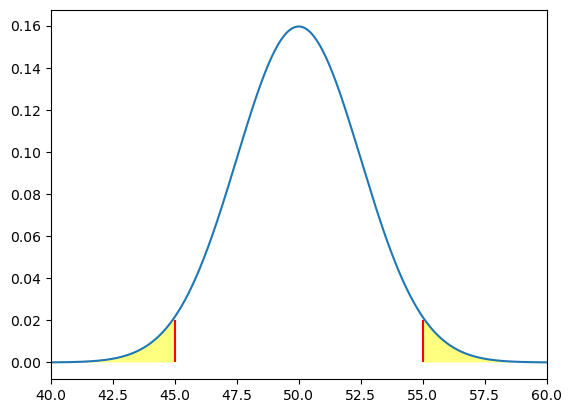

In [ ]:
x = np.arange(0, 100, 0.01)

mu = 50
std = 2.5

x_pdf = norm.pdf(x, loc=mu, scale=std)

fig, ax = plt.subplots()
ax.plot(x, x_pdf)
# highlighting the critical regions
ax.fill_between(x, x_pdf, where=x<45, facecolor='yellow', alpha=0.5)
ax.fill_between(x, x_pdf, where=x>55, facecolor='yellow', alpha=0.5)

# lines corresponding to defined critical regions
ax.vlines([45, 55], 0, 0.02, 'r')
plt.xlim([40, 60]);

## Loading data
The data folder should be in the same directory as this Notebook

In [ ]:
# data folder:
# 'signature_samples/biometrics/'
# 'signature_samples/calgary/'
# 'signature_samples/hello/'

# 'genuine' or 'impostor'
subdir = 'impostor/'
data_dir = '../signature_samples/biometrics/' + subdir

csv_file = pd.read_csv(data_dir + '2.csv')

coord1 = csv_file[['X', 'Y']].to_numpy()
time1 = csv_file['Time'].to_numpy().reshape((-1,1))
prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

csv_file.head()

FileNotFoundError: [Errno 2] No such file or directory: '../signature_samples/biometrics/impostor/2.csv'

## Plotting based on Pressure

In [ ]:
# to correctly map the pressure into the colormap the normalization is required 
prs1 = prs1 / np.max(prs1) * 255
prs1 = prs1.astype(int)

pressuremap = cm.get_cmap('jet', np.max(prs1)+1)

In [ ]:
for i in range(len(prs1)-1):
    c = pressuremap(prs1[i]).squeeze()
    
    time_diff = abs(time1[i+1] - time1[i])
    if time_diff == 0:
        time_diff = 0.0001
        
    if time_diff < 17: # You may need to change this threshould
        im = plt.plot(coord1[i:i+2,0], -coord1[i:i+2,1], c=c)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pen pressure')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm);

## Plotting presure over time

In [ ]:
# removing outliers (after normalization): < 250 and > 150
prs = []
for x in prs1:
    if (x > 150 and x < 250):
        prs.append(x)

In [ ]:
np.max(prs), np.min(prs), np.mean(prs)

(249, 152, 216.90580545943868)

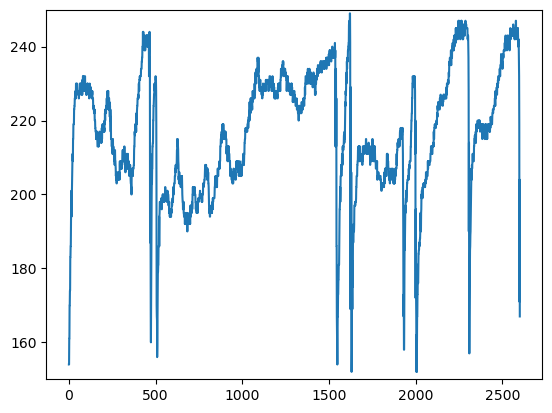

In [ ]:
plt.plot(prs)
plt.ylim([150, 250]);

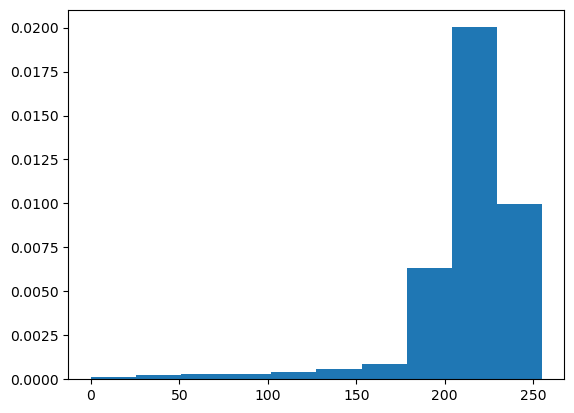

In [ ]:
plt.hist(prs1, density=True);

210.82958665699783 33.413596352704396


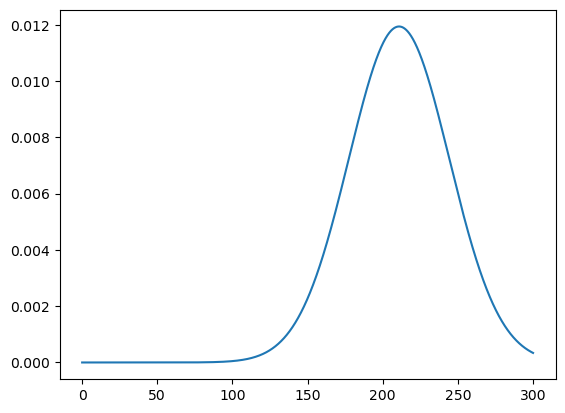

In [ ]:
mu_prs = np.mean(prs1)
std_prs = np.std(prs1)
print(mu_prs, std_prs)

x = np.arange(0, 300, 0.01)

x_pdf = norm.pdf(x, loc=mu_prs, scale=std_prs)

plt.plot(x, x_pdf);

## Plotting and calculating the Velocity

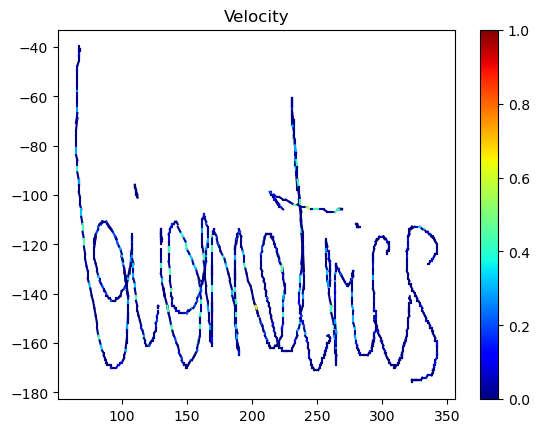

In [ ]:
vel = np.zeros((len(time1)-1, 1))

for i in range(len(time1)-1):
    distance = np.sqrt((coord1[i+1,0] - coord1[i,0])**2 + 
                       (coord1[i+1,1] - coord1[i,1])**2)

    # if too fast, time_diff = 0
    time_diff = abs(time1[i+1] - time1[i])
    if time_diff != 0:
        vel[i] = distance / time_diff
    vel[i] = int(vel[i] * 1000) + 1

vel = np.insert(vel, 0, 1)
vel = vel / np.max(vel) * 255
vel = vel.astype(int)

velmap = cm.get_cmap('jet', np.max(vel)+1)

for i in range(len(vel)-1):
    c = velmap(vel[i])
    
    time_diff = abs(time1[i+1] - time1[i])
        
    if time_diff < 17: # You may need to change this threshould
        plt.plot(coord1[i:i+2,0], -coord1[i:i+2,1], c=c)
plt.title('Velocity')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm);

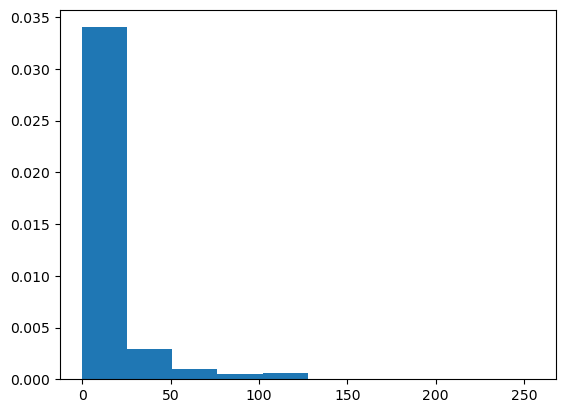

In [ ]:
plt.hist(vel, density=True);

## Plotting Pressure in 3D

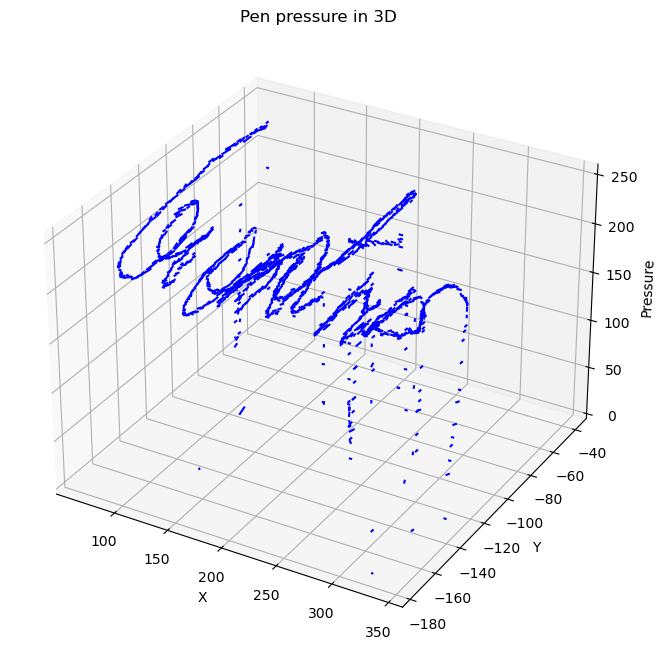

In [ ]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for i in range(len(coord1)-1):
    time_diff = abs(time1[i+1] - time1[i])
        
    if time_diff < 18: # You may need to change this threshould
        ax.plot3D(coord1[i:i+2,0], -coord1[i:i+2,1], prs1[i], color='blue')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pressure')
ax.set_title('Pen pressure in 3D');

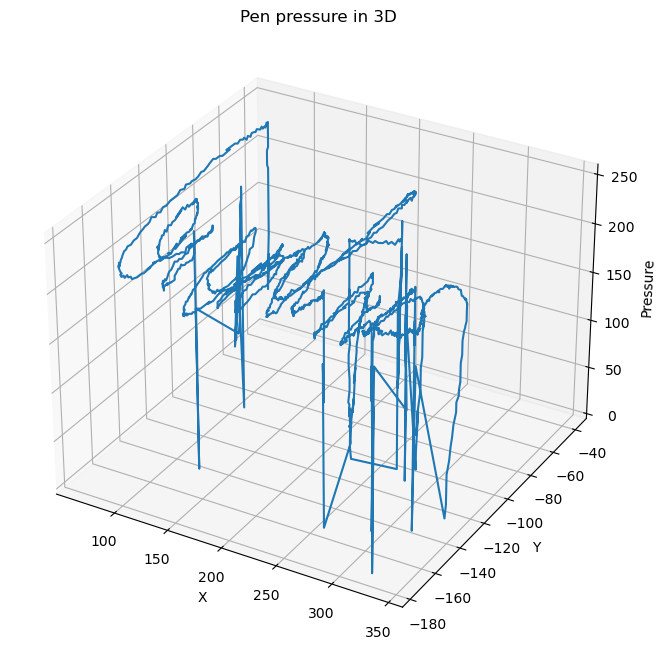

In [ ]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.plot3D(coord1[:,0].flatten(), -coord1[:,1].flatten(), prs1.flatten())
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pressure')
ax.set_title('Pen pressure in 3D');

## Statistical Evaluation

In [ ]:
def calc_velocity(time, coords):
    vel = np.zeros((len(time)-1, 1))

    for i in range(len(time)-1):
        distance = np.sqrt((coords[i+1,0] - coords[i,0])**2 +
                           (coords[i+1,1] - coords[i,1])**2)
        
        # if too fast time_diff = 0
        time_diff = time[i+1] - time[i]
        if time_diff == 0:
            time_diff = 0.0001

        vel[i] = distance / time_diff
        vel[i] = int(vel[i] * 1000) + 1

    vel = np.insert(vel, 0, 1)
    vel = vel / np.max(vel) * 255
    vel = vel.astype(int)
    
    return vel

In [ ]:
# columns: mean_vel, std_vec, mean_prs, std_prs
stats_measures = np.zeros((30,4))

# using 10-30 signatures
for i in range(30):
    csv_file = pd.read_csv(data_dir + '%d.csv' % (i+1))
    
    coord1 = csv_file[['X', 'Y']].to_numpy()
    time1 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time1, coord1)
    
    stats_measures[i, 0] = np.mean(vel)
    stats_measures[i, 1] = np.std(vel)
    
    stats_measures[i, 2] = np.mean(prs1)
    stats_measures[i, 3] = np.std(prs1)
    
    print('#%d - pressure: %.2f; velocity: %.2f' %\
          (i, np.mean(prs1), np.mean(vel)))

FileNotFoundError: [Errno 2] No such file or directory: '../signature_samples/biometrics/impostor/1.csv'

In [ ]:
# getting only the 1st velocity 'mean' and 'std'
print(stats_measures[0,0], stats_measures[0,1])

n = norm(stats_measures[0,0], stats_measures[0,1])

In [ ]:
x = np.arange(-100, 100, 0.1)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, n.pdf(x))
plt.title('Theoretical PDF of Normal distribution');

plt.subplot(1,2,2)
plt.hist(stats_measures[:,0], density=True);
plt.title('Histogram of the recovered data');

# put the name of the set in the title

## Exercises

**Specific Questions** (See the handout PDF for details)

- **Exercise 4** (3 marks): Now  perform statistical analysis of pressure and velocity distribution  across average values of pressure or 30 signatures of the same person. We will represent the pressure of each signature by its average (mean) value, and then consider the distribution of these average values across genuine signatures. Consider 30 genuine signatures (yours or pre-recorded sample set, part a), and calculate average (mean) values and deviation from average (which will be calculated using standard deviation) for pressure. Plot a normal distribution of the average pressure values across the 30 signatures of the same individual. Perform the same for velocity. 